In [33]:
import sys


In [34]:
import matplotlib
import numpy as np
import pandas as pd
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('e1.txt',sep=':',error_bad_lines=False, warn_bad_lines=False)

In [36]:
df = df. dropna()

In [37]:
df["person"] = df["person"].str.lower()
df["line"] = df["line"].str.lower()

# Here we replace slashes with a space

In [38]:
df["person"]= df["person"].str.replace("/", " ", case = False) 

In [39]:
df

,person,line
0,waymar royce,what d’you expect? they’re savages. one lot s...
1,will,i’ve never seen wildlings do a thing like thi...
2,waymar royce,how close did you get?
3,will,close as any man would.
4,gared,we should head back to the wall.
...,...,...
416,cersei,he saw us!
417,jaime,i heard you the first time. (to bran) quite t...
418,bran,ten
420,jaime,ten.


# Now we delete second name for people
### We are using regex

In [40]:
df['person'] = df['person'].str.replace('/',' ') # Replace character for another
df['person']=df['person'].str.replace(r"\(.*\)","") # Replace everything between  brackets
df['person']=df['person'].str.replace(r'^(\s*(?:\S+\s+){1})\S+',r'\1') # Delete last name

In [41]:
df.person.unique()

array(['waymar ', 'will', 'gared', 'royce', 'jon', 'septa  ', 'sansa',
       'septa ', 'ned', 'robb', 'jon ', 'cassel', 'catelyn', 'will ',
       'bran', 'theon', 'robb ', 'bran ', 'cersei', 'jaime', 'maester ',
       'luwin', 'arya ', 'robert', 'arya', 'tyrion', 'ros', 'viserys ',
       'viserys', 'daenerys', 'maid', 'illyrio', 'benjen', 'tyrion ',
       'sansa ', 'cersei ', 'a ', 'jorah', 'khal ', 'the '], dtype=object)

# Here we get rid of brackets and everything inside of them
### Using regex

In [42]:
df['line'] = df['line'].str.replace(r"\(.*\)","")

In [43]:
df['person'] = df['person'].str.replace(r"\(.*\)","")

df

,person,line
0,waymar,what d’you expect? they’re savages. one lot s...
1,will,i’ve never seen wildlings do a thing like thi...
2,waymar,how close did you get?
3,will,close as any man would.
4,gared,we should head back to the wall.
...,...,...
416,cersei,he saw us!
417,jaime,i heard you the first time. quite the little...
418,bran,ten
420,jaime,ten.


## Deleting White Space 


In [44]:
# rstrip and lstrip mean you delete spaces before and after the sentence


In [45]:
df.person = df.person.str.rstrip()

In [46]:
df.columns = df.columns.str.lstrip()

In [47]:
df = df[df.person != "the"]
df = df[df.person != "a"]

In [48]:
df['line'] = df['line'].str.replace(".","")
df['line'] = df['line'].str.replace(",","")

In [49]:
df

,person,line
0,waymar,what d’you expect? they’re savages one lot st...
1,will,i’ve never seen wildlings do a thing like thi...
2,waymar,how close did you get?
3,will,close as any man would
4,gared,we should head back to the wall
...,...,...
416,cersei,he saw us!
417,jaime,i heard you the first time quite the little ...
418,bran,ten
420,jaime,ten


In [50]:
df['exc'] = df['line'].map(lambda x: x.count("!"))

In [51]:
df['ques'] = df['line'].map(lambda x: x.count("?"))

In [52]:
df1 = df.groupby("person")["exc"].sum().reset_index()
df1

,person,exc
0,arya,1
1,benjen,0
2,bran,6
3,cassel,0
4,catelyn,1
5,cersei,1
6,daenerys,0
7,gared,0
8,illyrio,0
9,jaime,0


In [53]:
df1 = df1.sort_values('exc')

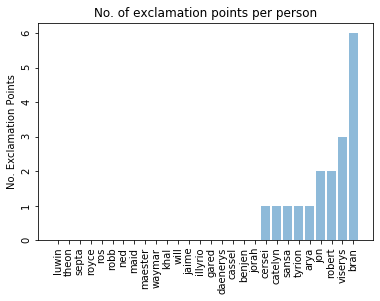

In [54]:
plt.bar(df1.person, df1.exc, align='center', alpha=0.5)
plt.ylabel('No. Exclamation Points')
plt.title('No. of exclamation points per person')
plt.yticks(rotation=90)
plt.xticks(rotation=90)
plt.show()

In [56]:
df['words'] = [len(x.split()) for x in df['line'].tolist()]

In [57]:
df

,person,line,exc,ques,words
0,waymar,what d’you expect? they’re savages one lot st...,0,1,24
1,will,i’ve never seen wildlings do a thing like thi...,0,0,21
2,waymar,how close did you get?,0,1,5
3,will,close as any man would,0,0,5
4,gared,we should head back to the wall,0,0,7
...,...,...,...,...,...
416,cersei,he saw us!,1,0,3
417,jaime,i heard you the first time quite the little ...,0,2,17
418,bran,ten,0,0,1
420,jaime,ten,0,0,1


In [59]:
!{sys.executable} -m pip install squarify
import matplotlib.pyplot as plt
import squarify    # pip install squarify (algorithm for treemap)
 

In [60]:
df2 = df.groupby("person")["words"].sum().reset_index()
df2

,person,words
0,arya,15
1,benjen,139
2,bran,61
3,cassel,31
4,catelyn,378
5,cersei,140
6,daenerys,59
7,gared,29
8,illyrio,177
9,jaime,245


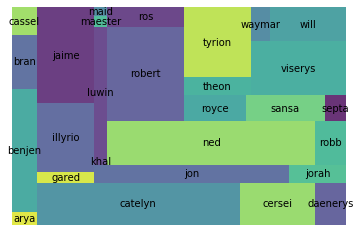

In [62]:
squarify.plot(sizes=df2['words'], label=df2['person'], alpha=.8 )
plt.axis('off')
plt.show()


In [77]:
!{sys.executable} -m pip install wordcloud
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS

In [78]:
df3 = df[df['person']  == 'jon']

In [79]:
words = ''
for i in df3.line.values:
    words += '{} '.format(i.lower()) # save all words in a string
    
wd = pd.DataFrame(Counter(words.split()).most_common(200), columns=['word', 'frequency'])
wd = wd.iloc[50:]
    
data = dict(zip(wd['word'].tolist(), wd['frequency'].tolist()))
data

{'children': 1,
 'direwolf': 1,
 'sigil': 1,
 'house': 1,
 'they': 1,
 'were': 1,
 'meant': 1,
 'have': 1,
 'them': 1,
 'not': 1,
 'get': 1,
 'why’s': 1,
 'dead-set': 1,
 'us': 1,
 'getting': 1,
 'pretty': 1,
 'king?': 1,
 'uncle': 1,
 'benjen!': 1,
 'lady': 1,
 'thought': 1,
 'it': 1,
 'might': 1,
 'insult': 1,
 'royal': 1,
 'family': 1,
 'seat': 1,
 'bastard': 1,
 'in': 1,
 'their': 1,
 'midst': 1,
 'take': 1,
 'with': 1,
 'when': 1,
 'let': 1,
 'ask': 1,
 'him': 1,
 'he': 1,
 'ready': 1,
 'swear': 1,
 'oath': 1,
 'care': 1,
 'that': 1,
 'what’re': 1,
 'doing': 1,
 'there?': 1,
 'you’re': 1,
 'tyrion': 1,
 'lannister': 1,
 'queen’s': 1,
 'brother?': 1,
 'eddard': 1,
 'my': 1,
 'hell': 1,
 'being': 1,
 'bastard?': 1}

(-0.5, 799.5, 399.5, -0.5)

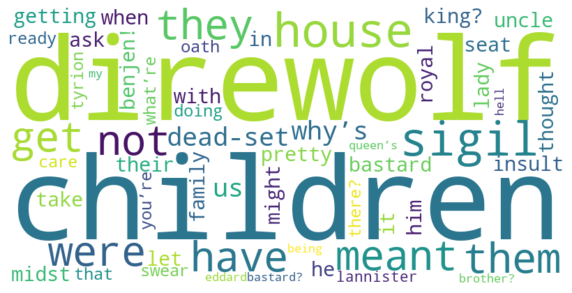

In [80]:
wc = WordCloud(background_color='white',
                stopwords=STOPWORDS,
                width=800,
                height=400,
                max_words=200).generate_from_frequencies(data)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')

plt.axis('off')